# Section 1 : Libraries

In [1]:
import pandas as pd

# Section 2 : Viewing and analyzing the data

In [37]:
medical_df = pd.read_csv('./data/medical-charges.csv')

In [38]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
# Statistics for the numerical columns

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Section 3 : Exploratory Analysis and Visualization

# Section 3 : Libraries

In [11]:
#! pip install plotly
import plotly.express as px # type: ignore
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Section 4 : Age column

In [13]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
#! pip install nbformat==5.1.2
#! pip install --upgrade pip
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)

# Section 5 : Body Mass Index

In [16]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

# Section 6 : Charges

In [17]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# Section 7 : Smoker

In [19]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [22]:
fig = px.histogram(medical_df,
                   x='region',
                   color='sex',
                   facet_col='children',
                   marginal='box',
                   title='Annual Medical Charges by Region, Sex, and Children')
fig.update_layout(bargap=0.1)
fig.show()

# Section 8 : Age and Charges

In [23]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# Section 9 : BMI and Charges

In [24]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# Section 10 : Children and Charges 

In [25]:
px.violin(medical_df, x='children', y='charges')

In [26]:
"""
Create some more graphs to visualize
how the "charges" column is related to other columns
("children", "sex", "region" and "smoker").
Summarize the insights gathered from these graphs.
"""

#1. Violin Plot: Charges vs. Smoker
import plotly.express as px

fig = px.violin(medical_df,
                x='smoker',
                y='charges',
                color='smoker',
                box=True,
                points='all',
                title='Distribution of Medical Charges by Smoking Status')
fig.show()

In [27]:
#2. Violin Plot: Charges vs. Sex
fig = px.violin(medical_df,
                x='sex',
                y='charges',
                color='sex',
                box=True,
                points='all',
                title='Distribution of Medical Charges by Sex')
fig.show()

In [28]:
#Bar Plot: Average Charges by Region
avg_charges_by_region = medical_df.groupby('region')['charges'].mean().reset_index()

fig = px.bar(avg_charges_by_region,
             x='region',
             y='charges',
             color='region',
             title='Average Medical Charges by Region')
fig.show()

In [29]:
# Bar Plot: Average Charges by Number of Children
avg_charges_by_children = medical_df.groupby('children')['charges'].mean().reset_index()

fig = px.bar(avg_charges_by_children,
             x='children',
             y='charges',
             color='children',
             title='Average Medical Charges by Number of Children')
fig.show()

# Section 11 : Correlation

In [30]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [31]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [32]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [34]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [33]:
# convert categorical data into normal data
smokerValues = {'no':0,'yes':1}
smokerNumeric = medical_df.smoker.map(smokerValues)
smokerNumeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [35]:
medical_df.charges.corr(smokerNumeric)

np.float64(0.7872514304984778)

In [44]:
px.scatter(medical_df, x='age', y='age')

In [43]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

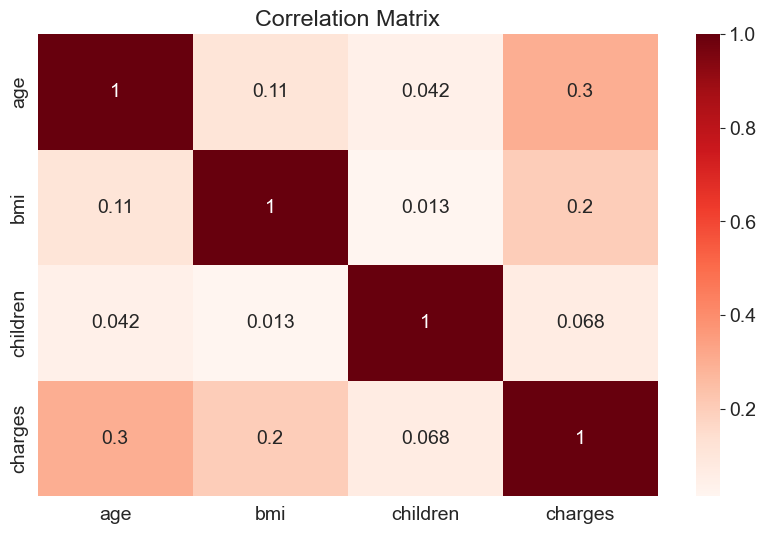

In [46]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')